In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from tqdm import tqdm
import warnings 
warnings.filterwarnings('ignore')

In [24]:
import os
import glob

In [ ]:
##Define Path

In [26]:
parent_folder = r"C:\Users\This PC\Desktop\Waste Classification ML\Waste_Classification" 

In [28]:
train_folder = os.path.join(parent_folder, "TRAIN")
test_folder = os.path.join(parent_folder, "TEST")

train_categories = [f for f in os.listdir(train_folder) if os.path.isdir(os.path.join(train_folder, f))]
test_categories = [f for f in os.listdir(test_folder) if os.path.isdir(os.path.join(test_folder, f))]

print("Train categories:", train_categories)
print("Test categories:", test_categories)


Train categories: ['O', 'R']
Test categories: ['O', 'R']


In [30]:
train_images = glob.glob(os.path.join(train_folder, "*", "*.*"))
test_images = glob.glob(os.path.join(test_folder, "*", "*.*"))

print("Number of training images:", len(train_images))
print("Number of test images:", len(test_images))


Number of training images: 22564
Number of test images: 2513


In [13]:
test_images

['C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TEST\\O\\O_12568.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TEST\\O\\O_12569.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TEST\\O\\O_12570.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TEST\\O\\O_12571.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TEST\\O\\O_12572.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TEST\\O\\O_12573.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TEST\\O\\O_12574.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TEST\\O\\O_12575.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TEST\\O\\O_12576.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TEST\\O\\O_12

In [11]:
train_images

['C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN\\O\\O_1.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN\\O\\O_10.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN\\O\\O_100.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN\\O\\O_1000.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN\\O\\O_10000.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN\\O\\O_10001.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN\\O\\O_10002.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN\\O\\O_10003.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN\\O\\O_10004.jpg',
 'C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN\\O\\O_10

In [32]:
train_path = "C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN"
test_path = "C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TEST"

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [36]:
from cv2 import cvtColor
x_data =[]
y_data =[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(os.path.basename(category))
       # y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 9999/9999 [00:24<00:00, 401.00it/s]


In [38]:
data.shape

(22564, 2)

In [40]:
from collections import Counter
Counter(y_data)

Counter({'O': 12565, 'R': 9999})

In [42]:
import matplotlib.pyplot as plt

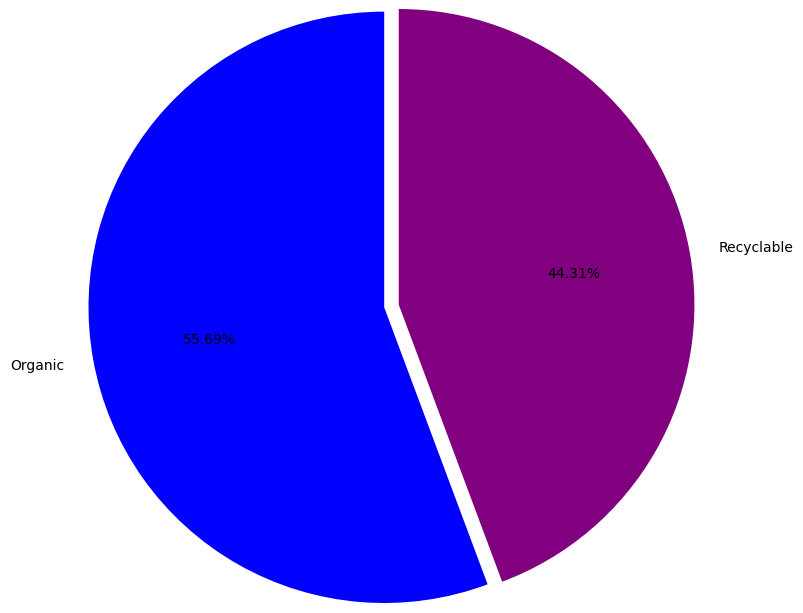

In [44]:
colors = ['blue','purple']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

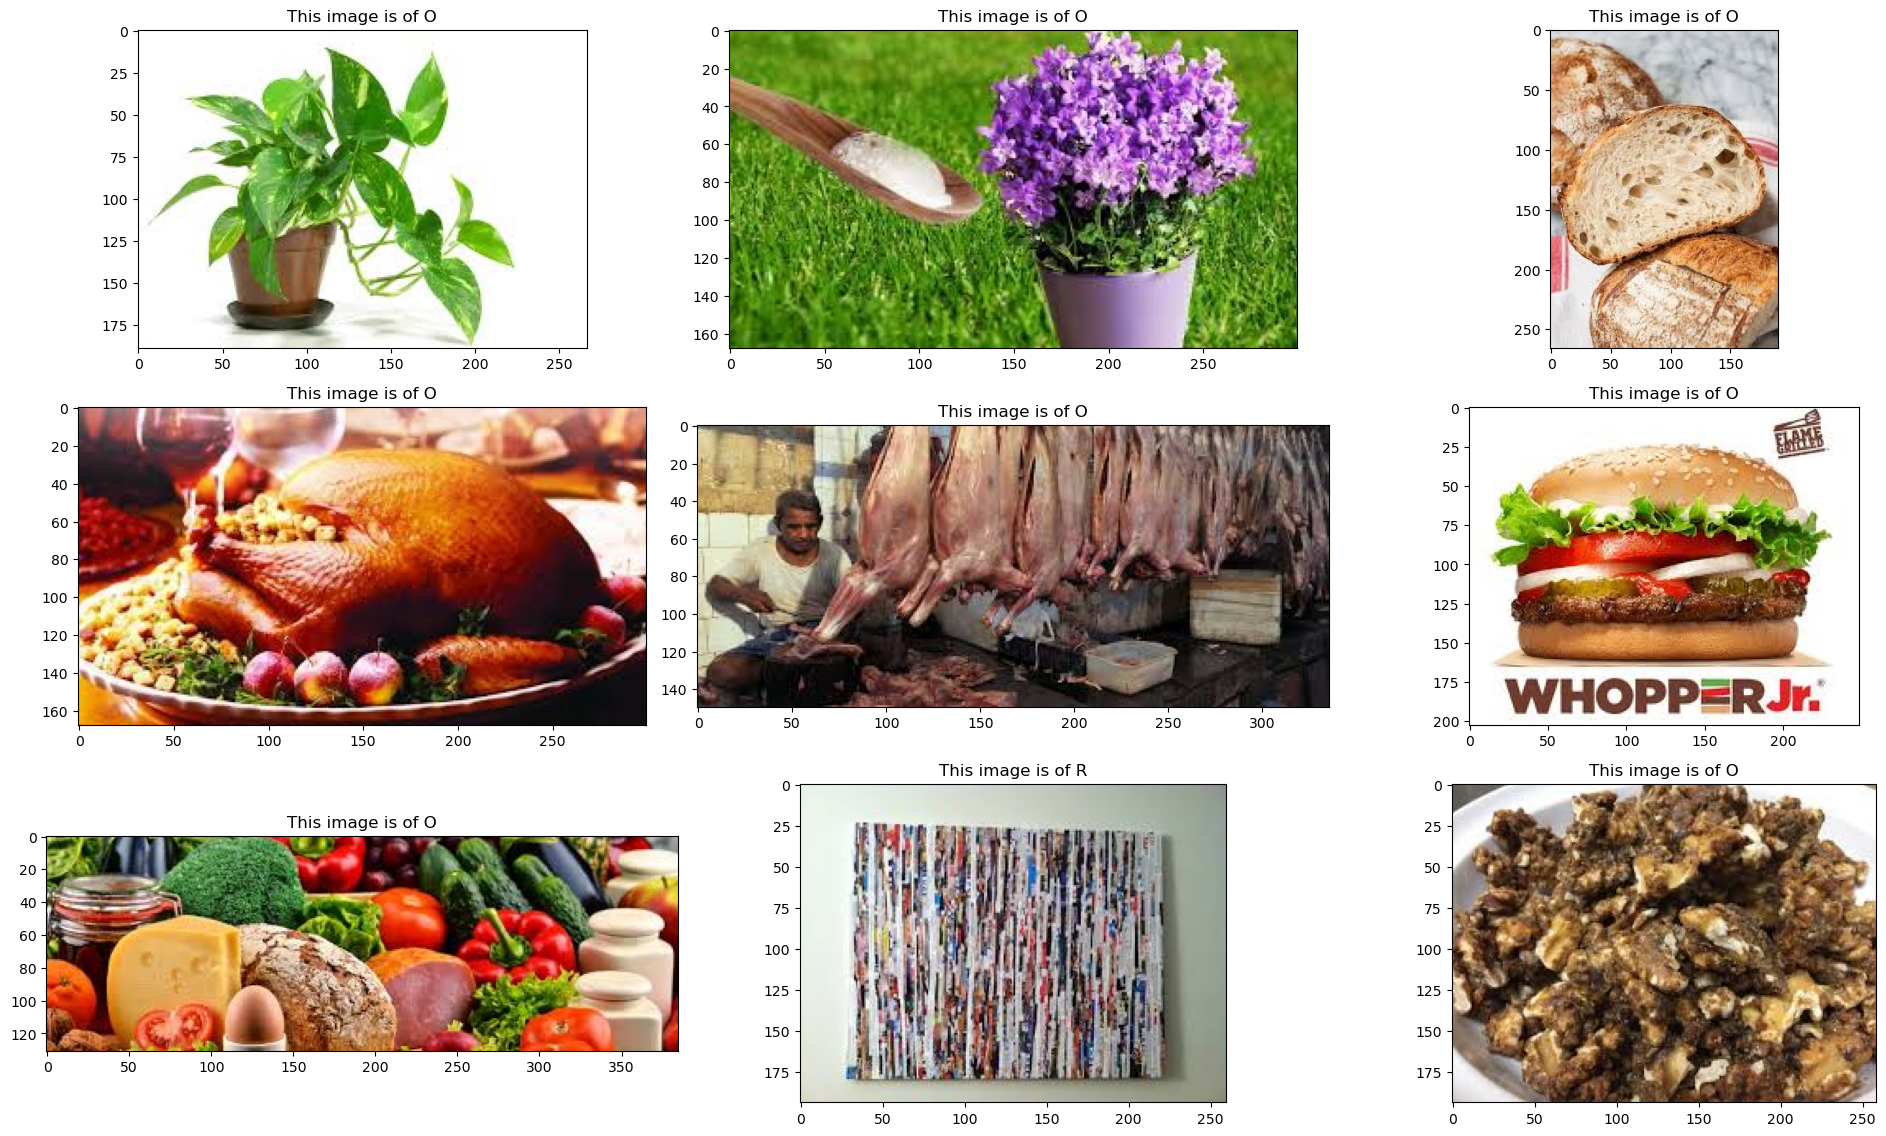

In [46]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3, (i % 12) + 1)
    index = np.random.randint(len(data))
    plt.title('This image is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [48]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [50]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(len(train_categories), activation='softmax')) 

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 64

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [54]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [56]:
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [166]:
hist = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator)

Epoch 1/5
353/353 ━━━━━━━━━━━━━━━━━━━━ 503s 1s/step - accuracy: 0.9968 - loss: 0.0127 - val_accuracy: 0.9113 - val_loss: 0.9402
Epoch 2/5
353/353 ━━━━━━━━━━━━━━━━━━━━ 447s 1s/step - accuracy: 0.9963 - loss: 0.0138 - val_accuracy: 0.8934 - val_loss: 1.2019
Epoch 3/5
353/353 ━━━━━━━━━━━━━━━━━━━━ 401s 1s/step - accuracy: 0.9981 - loss: 0.0079 - val_accuracy: 0.9085 - val_loss: 1.1189
Epoch 4/5
353/353 ━━━━━━━━━━━━━━━━━━━━ 397s 1s/step - accuracy: 0.9933 - loss: 0.0222 - val_accuracy: 0.9069 - val_loss: 1.1097
Epoch 5/5
353/353 ━━━━━━━━━━━━━━━━━━━━ 398s 1s/step - accuracy: 0.9957 - loss: 0.0148 - val_accuracy: 0.9013 - val_loss: 1.0981


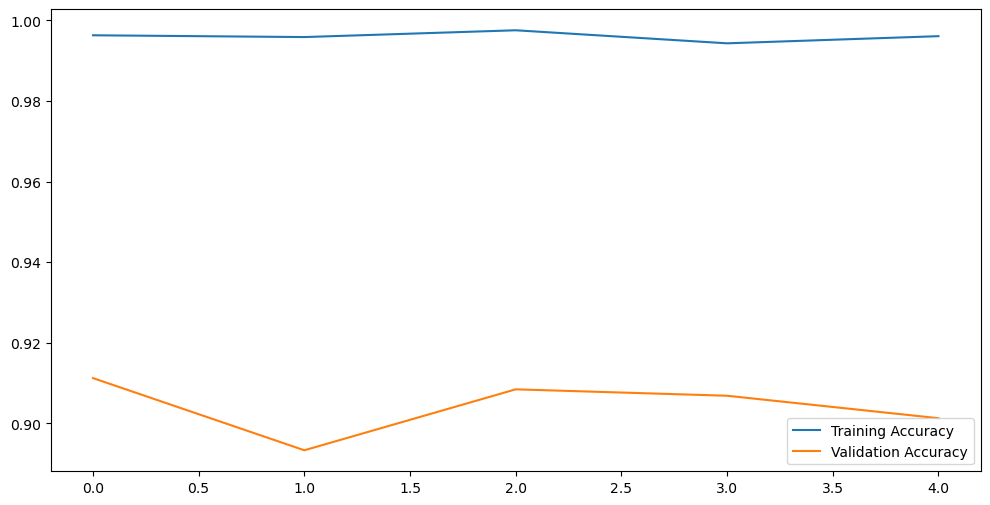

In [172]:
plt.figure(figsize=(12, 6))
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

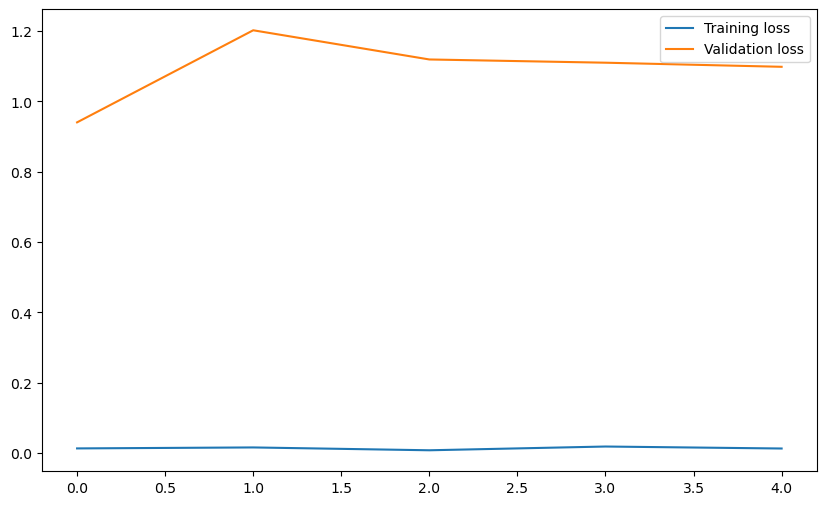

In [170]:
plt.figure(figsize=(10, 6))
plt.plot(hist.history['loss'], label='Training loss')
plt.plot(hist.history['val_loss'], label='Validation loss')
plt.legend()


In [174]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("This image shows recyclable waste")
    elif result == 1: print("This image shows organic waste")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
This image shows organic waste


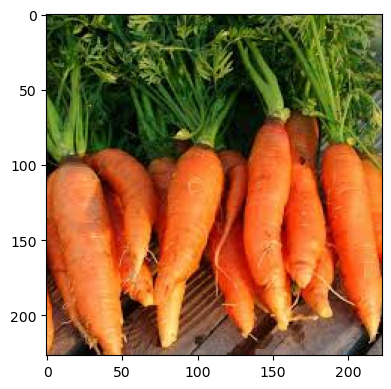

In [176]:
test_img = cv2.imread('C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TEST\\O\\O_12568.jpg')
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
This image shows organic waste


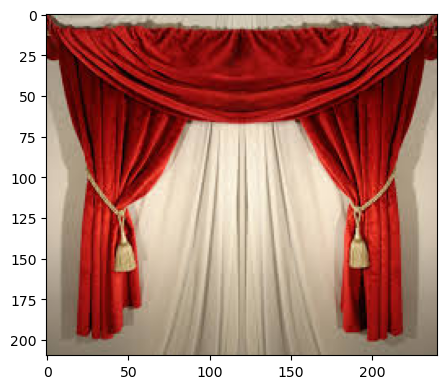

In [180]:
test_img = cv2.imread('C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TEST\\R\\R_10000.jpg')
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
This image shows recyclable waste


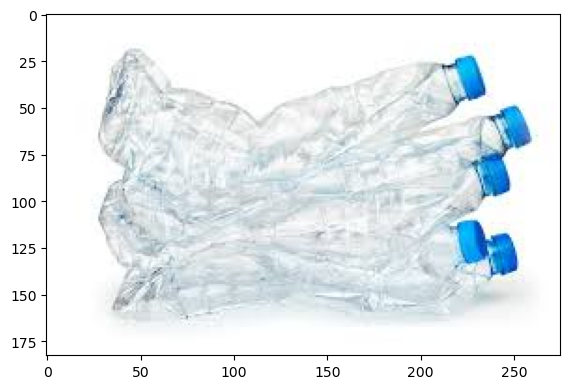

In [178]:
test_img = cv2.imread('C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TRAIN\\R\\R_17.jpg')
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
This image shows recyclable waste


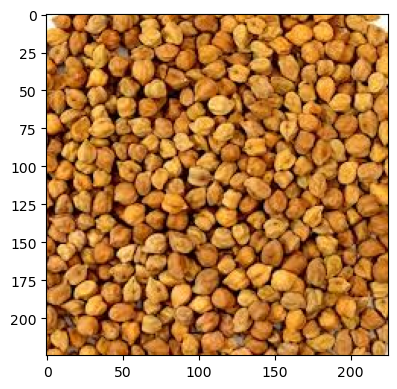

In [182]:
test_img = cv2.imread('C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TEST\\O\\O_13559.jpg')
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
This image shows organic waste


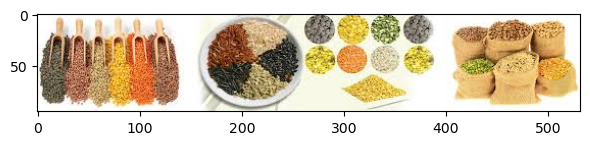

In [184]:
test_img = cv2.imread('C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TEST\\O\\O_13561.jpg')
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
This image shows organic waste


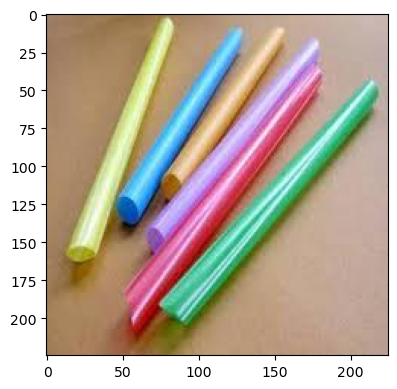

In [186]:
test_img = cv2.imread('C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TEST\\R\\R_10448.jpg')
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
This image shows organic waste


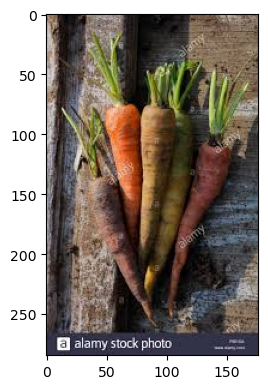

In [188]:
test_img = cv2.imread('C:\\Users\\This PC\\Desktop\\Waste Classification ML\\Waste_Classification\\TEST\\O\\O_12766.jpg')
predict_func(test_img)

In [68]:
hist.history

{'accuracy': [0.803447961807251,
  0.8455061316490173,
  0.8594220876693726,
  0.8749778270721436,
  0.8905335664749146,
  0.9058234095573425,
  0.924703061580658,
  0.9430952072143555,
  0.9592714309692383,
  0.969331681728363,
  0.977663516998291,
  0.9801453351974487,
  0.9824942350387573,
  0.9875022172927856,
  0.9879897236824036],
 'loss': [0.4596758186817169,
  0.3827706575393677,
  0.34894225001335144,
  0.31492915749549866,
  0.28004929423332214,
  0.24148061871528625,
  0.20044538378715515,
  0.15234363079071045,
  0.11779661476612091,
  0.08838394284248352,
  0.06851297616958618,
  0.06286410987377167,
  0.050618525594472885,
  0.04131398722529411,
  0.03960190713405609],
 'val_accuracy': [0.8682849407196045,
  0.8651014566421509,
  0.8881814479827881,
  0.842419445514679,
  0.8881814479827881,
  0.9033028483390808,
  0.8937525153160095,
  0.9072821140289307,
  0.8826104402542114,
  0.8834062814712524,
  0.9021090269088745,
  0.8973338603973389,
  0.8909669518470764,
  0.904

In [70]:
import json
# Serializing json
json_object = json.dumps(hist.history, indent=2)
 
# Writing to sample.json
with open("C:/Users/This PC/Desktop/Waste Classification ML/sample.json", "w") as outfile:
    outfile.write(json_object)